# 12 Association Rules

In [ ]:
# Setup
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

---

## 5. Association Rules

Le **Association Rules** (regole di associazione) scoprono relazioni interessanti tra variabili in grandi dataset. L'applicazione classica e la **Market Basket Analysis**: quali prodotti vengono acquistati insieme?

### Concetti fondamentali

Una regola ha la forma: $\{A\} \rightarrow \{B\}$ ("se A allora B")

**Metriche chiave**:

1. **Support**: frequenza con cui l'itemset appare
   $$\text{Support}(A \rightarrow B) = P(A \cap B)$$

2. **Confidence**: probabilita di B dato A
   $$\text{Confidence}(A \rightarrow B) = P(B|A) = \frac{P(A \cap B)}{P(A)}$$

3. **Lift**: quanto A aumenta la probabilita di B
   $$\text{Lift}(A \rightarrow B) = \frac{P(A \cap B)}{P(A) \cdot P(B)}$$
   - Lift > 1: associazione positiva
   - Lift = 1: indipendenza
   - Lift < 1: associazione negativa

### 5.1 Algoritmo Apriori

**Apriori** e l'algoritmo classico per trovare frequent itemsets e generare regole. Si basa sul principio: se un itemset e infrequente, tutti i suoi superset sono infrequenti.

In [17]:
# SEZIONE 5.1: Association Rules con Apriori
# Questa sezione e completamente incapsulata

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Dataset di transazioni (simulazione supermercato)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

# Encoding one-hot
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset codificato (prime 5 transazioni):")
print(df_trans.head())
print(f"\nDimensioni: {df_trans.shape[0]} transazioni, {df_trans.shape[1]} prodotti")

Dataset codificato (prime 5 transazioni):
   Birra  Burro   Cola  Latte   Pane  Pannolini   Uova
0  False   True  False   True   True      False  False
1  False  False  False   True   True      False  False
2   True  False  False  False   True       True   True
3   True  False   True   True  False       True  False
4   True  False  False   True   True       True  False

Dimensioni: 15 transazioni, 7 prodotti


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [18]:
# Frequent Itemsets con Apriori

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Ricreo il dataset (incapsulamento)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

# Trova itemset frequenti (support >= 30%)
frequent_itemsets = apriori(df_trans, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

print("ITEMSET FREQUENTI (support >= 30%):")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Genera regole di associazione
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6,
    num_itemsets=len(frequent_itemsets)
)

# Selezioniamo solo le colonne piu importanti
rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

# Separiamo regole con lift >= 1 (associazione positiva) da quelle con lift < 1
rules_positive = rules_display[rules_display['lift'] >= 1.0]
rules_negative = rules_display[rules_display['lift'] < 1.0]

print("\n" + "=" * 60)
print("REGOLE CON ASSOCIAZIONE POSITIVA (lift >= 1):")
print("=" * 60)
if len(rules_positive) > 0:
    print(rules_positive.sort_values('lift', ascending=False).to_string(index=False))
else:
    print("Nessuna regola con lift >= 1")

if len(rules_negative) > 0:
    print("\n" + "=" * 60)
    print("REGOLE CON ASSOCIAZIONE NEGATIVA (lift < 1):")
    print("=" * 60)
    print("Attenzione: lift < 1 indica che i prodotti appaiono MENO")
    print("insieme di quanto atteso se fossero indipendenti.")
    print(rules_negative.sort_values('lift', ascending=False).to_string(index=False))

ITEMSET FREQUENTI (support >= 30%):
    support            itemsets  length
1  0.733333             (Latte)       1
2  0.666667              (Pane)       1
0  0.533333             (Birra)       1
3  0.533333         (Pannolini)       1
7  0.466667       (Latte, Pane)       2
6  0.466667  (Birra, Pannolini)       2
5  0.333333       (Birra, Pane)       2
4  0.333333      (Birra, Latte)       2
8  0.333333  (Latte, Pannolini)       2
9  0.333333   (Pane, Pannolini)       2

REGOLE CON ASSOCIAZIONE POSITIVA (lift >= 1):
antecedents consequents  support  confidence     lift
      Birra   Pannolini 0.466667       0.875 1.640625
  Pannolini       Birra 0.466667       0.875 1.640625

REGOLE CON ASSOCIAZIONE NEGATIVA (lift < 1):
Attenzione: lift < 1 indica che i prodotti appaiono MENO
insieme di quanto atteso se fossero indipendenti.
antecedents consequents  support  confidence     lift
       Pane       Latte 0.466667    0.700000 0.954545
      Latte        Pane 0.466667    0.636364 0.954545


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

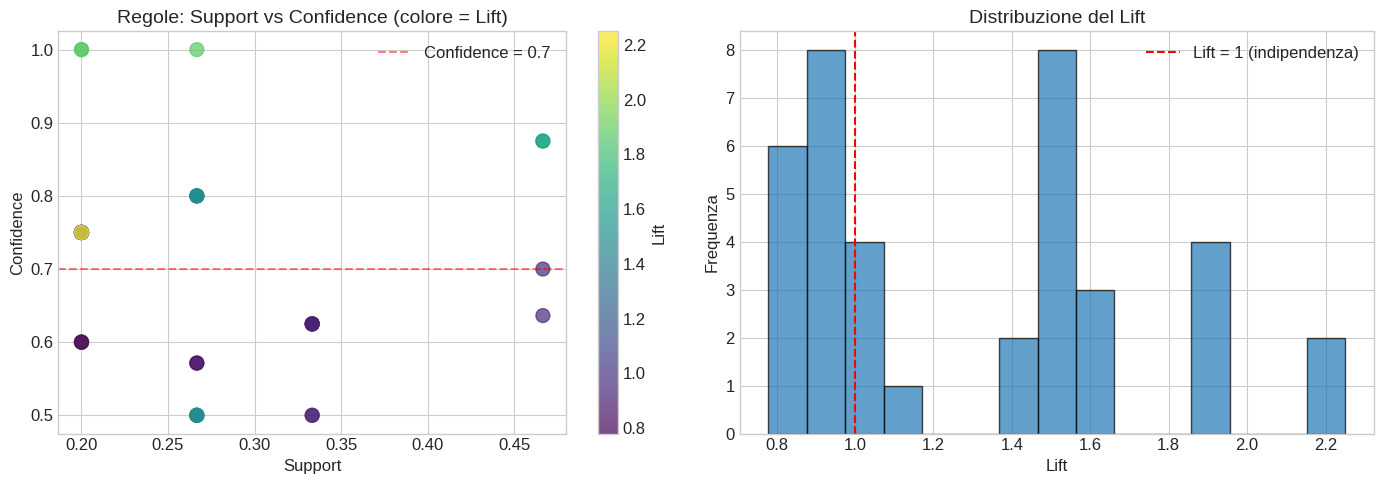

Nota: Lift > 1 indica associazione positiva (i prodotti si attraggono).


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [19]:
# Visualizzazione delle regole
# Soglie abbassate (min_support=0.2, min_confidence=0.5) per generare più regole per la visualizzazione

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Ricreo il dataset e le regole (incapsulamento)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

te = TransactionEncoder()
df_trans = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)
frequent_itemsets = apriori(df_trans, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,
                          num_itemsets=len(frequent_itemsets))

# Scatter plot Support vs Confidence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Support vs Confidence
scatter1 = axes[0].scatter(
    rules['support'],
    rules['confidence'],
    c=rules['lift'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter1, ax=axes[0], label='Lift')
axes[0].set_xlabel('Support', fontsize=12)
axes[0].set_ylabel('Confidence', fontsize=12)
axes[0].set_title('Regole: Support vs Confidence (colore = Lift)', fontsize=14)
axes[0].axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Confidence = 0.7')
axes[0].legend()

# Distribuzione Lift
axes[1].hist(rules['lift'], bins=15, edgecolor='black', alpha=0.7)
axes[1].axvline(x=1, color='red', linestyle='--', label='Lift = 1 (indipendenza)')
axes[1].set_xlabel('Lift', fontsize=12)
axes[1].set_ylabel('Frequenza', fontsize=12)
axes[1].set_title('Distribuzione del Lift', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

print("Nota: Lift > 1 indica associazione positiva (i prodotti si attraggono).")

**Osservazioni importanti sulle Association Rules**

- Support basso + Confidence alta = regola interessante ma rara
- Lift e la metrica piu informativa per identificare vere associazioni
- Per grandi dataset, l'algoritmo **FP-Growth** e piu efficiente di Apriori (evita la generazione esplicita dei candidati)
- Attenzione alle regole spurie: correlazione non implica causalita

**Applicazioni pratiche**

- Market basket analysis (cross-selling, layout negozio)
- Recommendation systems
- Web mining (pagine visitate insieme)
- Bioinformatica (geni co-espressi)